# NOTEBOOK 2: PREPROCESADO DE LOS DATOS
Trabajo fin de bootcamp

**Night Traders:**

<font color = "blue">Illari Alvarez-Gil, Andrés Guzzo, Dairon Andrés Benites, José Carlos Amo</font>

**Nuestro problema trata de un problema de aprendizaje supervisado (cada medida en el dataframe nos proporciona el número de días en carrarse un gap bajista) y que se trata de un problema de clasificación binaria (predecir si el gap bajista se cerrará en el mismo día en que se abre, o no)**

In [ ]:
# Cargo las librerías necesarias
import numpy as np
import pandas as pd
from google.colab import files
from pandas.plotting import scatter_matrix
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Cargar el dataset

full_df = pd.read_csv('./expanded_features_final.csv', sep=',', decimal='.')


**Separamos los datos en train, test, validacion**

In [ ]:
# División train/test/validacion.

train, temp = train_test_split(full_df, test_size=0.25, shuffle=True, random_state=0)   # asigno el 85% de los datos a training
validation, test = train_test_split(temp, test_size=0.7, shuffle=True, random_state=0) # 70% restante van a partes iguales a validacion y test

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
print(f'Dimensiones del dataset de validacion: {validation.shape}')

# Guardamos
train.to_csv('train.csv', sep=',', decimal='.', index=False)
files.download('train.csv')
validation.to_csv('validation.csv', sep=',', decimal='.', index=False)
files.download('validation.csv')
test.to_csv('test.csv', sep=',', decimal='.', index=False)
files.download('test.csv')


Dimensiones del dataset de training: (13911, 82)
Dimensiones del dataset de test: (3247, 82)
Dimensiones del dataset de validacion: (1391, 82)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**A partir de este momento cargamos el dataset de train y trabajamos únicamente con él**

In [ ]:
# Cargar el dataset de train
df = pd.read_csv('./train.csv', sep=',', decimal='.')
pd.options.display.max_rows = len(df)  # Para que muestre los listados completos a partir de aquí

In [ ]:
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13911 entries, 0 to 13910
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     13911 non-null  int64  
 1   CLOSURE                        13911 non-null  float64
 2   Open                           13911 non-null  float64
 3   High                           13911 non-null  float64
 4   Low                            13911 non-null  float64
 5   Close                          13911 non-null  float64
 6   Volume                         13911 non-null  float64
 7   Dividends                      13911 non-null  float64
 8   Stock Splits                   13911 non-null  float64
 9   company                        13911 non-null  object 
 10  SMA_10_Close                   13881 non-null  float64
 11  SMA_10_High                    13881 non-null  float64
 12  SMA_10_Low                     13881 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,13911.0,2.107567e+04,1.217730e+04,2.000000e+00,1.038150e+04,2.142700e+04,3.153750e+04,4.206800e+04
CLOSURE,13911.0,7.206527e-01,4.486946e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Open,13911.0,2.498057e+01,3.544705e+01,-2.079654e+00,3.925918e+00,7.942523e+00,2.780711e+01,2.072000e+02
High,13911.0,2.545445e+01,3.605877e+01,-2.081595e+00,4.003946e+00,8.084953e+00,2.826197e+01,2.110000e+02
Low,13911.0,2.481726e+01,3.521736e+01,-2.018017e+00,3.892563e+00,7.904752e+00,2.764248e+01,2.060000e+02
Close,13911.0,2.513871e+01,3.564700e+01,-2.077227e+00,3.953136e+00,8.002265e+00,2.794081e+01,2.076000e+02
Volume,13911.0,1.882529e+07,4.220341e+07,0.000000e+00,4.058910e+05,1.277424e+06,1.999154e+07,8.167494e+08
Dividends,13911.0,2.764053e-03,5.838991e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.914966e+00
Stock Splits,13911.0,7.501102e-05,8.847167e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.043478e+00
SMA_10_Close,13881.0,2.511600e+01,3.557118e+01,-1.986134e+00,3.951882e+00,8.051108e+00,2.785057e+01,2.059432e+02


**El df de train cuenta con 53946 entradas o filas y 82 columnas. Los tipos de datos son object, int64 y float64. La única variable tipo object es 'company', lo cual es lógico.**

**Lo primero es que aparece una columna llamada 'Unnamed: 0'. Esta columna suele aparecer en los DataFrames de pandas cuando se importan o exportan datos desde o hacia un archivo CSV y se incluye el índice del DataFrame como una columna adicional sin nombre. Vamos a borrarlo.**

In [ ]:
# Eliminar la columna 'Unnamed: 0' del DataFrame
df = df.drop('Unnamed: 0', axis=1)


**Vemos que hay filas con valores de Open, High, Low y Close negativos. Esto no tiene ninguna lógica de modo que eliminamos las filas con valores negativos en alguna de esas columnas:**

In [ ]:
# Eliminar las filas que tengan valores negativos en al menos una de las columnas 'Open', 'High', 'Low' y 'Close'
# Crear máscara booleana valor True para las filas con valores positivos en todas las columnas y False para todas las demás filas.
mask = (df['Open'] >= 0) & (df['High'] >= 0) & (df['Low'] >= 0) & (df['Close'] >= 0)
# Filtrar filas con valores no negativos
df = df[mask]


**Vemos también que hay valores muy extremos (8.888889e+09) para la variable PROFIT_%. En principio no hay que preocuparse porque son valores construidos por nosotros en el notebook anterior y todos ellos se refieren a los gaps que no se cierran en el mismo día, de modo que no hay que tomar ninguna acción en principio.**

**Donde si queremos fijarnos es en los datos de PROFIT_% para los gaps que se cierran en el mimso día (CLOSURE = 1) porque ahí si que hay datos elevados que por precaucion vamos a filtrar. Por ejemplo hay una empresa que tiene un beneficio intradía del 80%, lo cual es seguro un error**

In [ ]:
# Crear una máscara booleana para las filas que cumplen la condición
mask = df['CLOSURE'] == 1

# Obtener el mayor valor de 'PROFIT_%' para las filas que cumplen la condición
max_profit = df.loc[mask, 'PROFIT_%'].max()

# Mostrar el resultado
print(max_profit)

24.610587951388


**Vamos a eliminar las filas que cumplen con la condición de tener 'CLOSURE' igual a 1 y 'PROFIT_%' mayor a 20%**

In [ ]:
# Crear una máscara booleana para las filas que cumplen la condición
mask = (df['CLOSURE'] == 1) & (df['PROFIT_%'] > 20)

# Eliminar las filas que cumplen la condición
df = df.drop(df[mask].index)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLOSURE,13851.0,7.237023e-01,4.471820e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Open,13851.0,2.509055e+01,3.547632e+01,5.334449e-02,3.951542e+00,8.051466e+00,2.789520e+01,2.072000e+02
High,13851.0,2.556594e+01,3.608800e+01,5.712250e-02,4.031363e+00,8.206100e+00,2.834067e+01,2.110000e+02
Low,13851.0,2.492665e+01,3.524732e+01,5.323138e-02,3.916605e+00,7.983282e+00,2.772504e+01,2.060000e+02
Close,13851.0,2.524900e+01,3.567639e+01,5.517694e-02,3.977176e+00,8.089189e+00,2.800439e+01,2.076000e+02
Volume,13851.0,1.890614e+07,4.227680e+07,0.000000e+00,4.132600e+05,1.287952e+06,2.012277e+07,8.167494e+08
Dividends,13851.0,2.776026e-03,5.851597e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.914966e+00
Stock Splits,13851.0,7.533595e-05,8.866309e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.043478e+00
SMA_10_Close,13821.0,2.522490e+01,3.559836e+01,1.878380e-01,3.974740e+00,8.128519e+00,2.790239e+01,2.059432e+02
SMA_10_High,13821.0,2.554026e+01,3.601234e+01,1.930166e-01,4.027406e+00,8.250074e+00,2.825607e+01,2.082228e+02


**Vemos que la variable "company" es categórica por lo que conviene codificarla. Para ello vamos a usar Mean Encoding. Mean Encoding funciona mejor cuando:**

-El número de categorías es bastante grande, ya que la codificación one-hot puede generar un alto consumo de memoria.

-El orden no importa en la variable categórica.

**En la variable 'company' se cumplen estos criterios.**

**Además Mean Encoding tiene la ventaja de que no agrega columnas adicionales**

In [ ]:
# codificar "company" usando Mean Encoding y eligiendo la variable 'CLOSURE' variable sobre la que calcular la media
mean_encoding = df.groupby('company')['CLOSURE'].mean().to_dict()
company_dict = {k: v for k, v in zip(mean_encoding.keys(), mean_encoding.values())}
df['company'] = df['company'].map(mean_encoding)

# El diccionario "company_dict" contiene los valores originales de "company" como claves 
# y los valores numéricos de reemplazo como valores.
# Esto es MUY IMPORTANTE para hacer la codificacion en los datos de test y validacion usando exactamente este Encoder
print(company_dict)

{'ACS, Actividades de Construcción y Servicios, S.A.': 0.7467602591792657, 'Acciona, S.A.': 0.7695560253699789, 'Acerinox, S.A.': 0.750403442711135, 'Aena S.M.E., S.A.': 0.735080058224163, 'Amadeus IT Group, S.A.': 0.7231481481481481, 'ArcelorMittal S.A.': 0.6292217327459618, 'Banco Bilbao Vizcaya Argentaria, S.A.': 0.7101718532280539, 'Banco Santander, S.A.': 0.7154709614446071, 'Banco de Sabadell, S.A.': 0.7110141766630316}


**En este momento todos los valores son numéricos.**

**Vamos a verificar si hay valores especiales (NaN, infinitos) en en las variables del dataframe antes de realizar operaciones matemáticas o de normalización que podrían no manejar correctamente estos valores.** 

In [ ]:
# Calcular el porcentaje de valores NaN, infinitos positivos e infinitos negativos en cada columna
nan_pct = df.isin([np.nan]).mean() * 100
inf_pct = df.isin([np.inf, -np.inf]).mean() * 100

# Imprimir los resultados
print("Porcentaje de valores NaN:")
print(nan_pct)
print("\n**************\nPorcentaje de valores infinitos:")
print(inf_pct)

Porcentaje de valores NaN:
CLOSURE                           0.000000
Open                              0.000000
High                              0.000000
Low                               0.000000
Close                             0.000000
Volume                            0.000000
Dividends                         0.000000
Stock Splits                      0.000000
company                           0.000000
SMA_10_Close                      0.216591
SMA_10_High                       0.216591
SMA_10_Low                        0.216591
SMA_10_Open                       0.216591
SMA_10_Volume                     0.216591
EMA_10_Close                      0.216591
EMA_10_High                       0.216591
EMA_10_Low                        0.216591
EMA_10_Open                       0.216591
EMA_10_Volume                     0.216591
MACD_6_12_9_Close                 0.259909
MACD_6_12_9_Close_signal          0.404303
MACD_6_12_9_High                  0.259909
MACD_6_12_9_High_signal    

**Las columnas PSAR_0.02_0.2_down y PSAR_0.02_0.2_up tienen un numero muy alto de valores NaN, por lo que decidimos eliminarlas.**

In [ ]:
# Eliminar las columnas 'PSAR_0.02_0.2_down' y 'PSAR_0.02_0.2_up' del DataFrame
df = df.drop(['PSAR_0.02_0.2_down', 'PSAR_0.02_0.2_up'], axis=1)


**Eliminamos las filas con valores NaN y con valores infinito.**

In [ ]:
# Eliminar las filas que contienen valores NaN o valores infinitos
# Reemplazar los valores infinitos con NaN
df = df.replace([np.inf, -np.inf], np.nan)
# Eliminar los NaN
df = df.dropna()

In [ ]:
# Calcular el porcentaje de valores NaN, infinitos positivos e infinitos negativos en cada columna
nan_pct = df.isin([np.nan]).mean() * 100
inf_pct = df.isin([np.inf, -np.inf]).mean() * 100

# Imprimir los resultados
print("Porcentaje de valores NaN:")
print(nan_pct)
print("\n**************\nPorcentaje de valores infinitos:")
print(inf_pct)

Porcentaje de valores NaN:
CLOSURE                          0.0
Open                             0.0
High                             0.0
Low                              0.0
Close                            0.0
Volume                           0.0
Dividends                        0.0
Stock Splits                     0.0
company                          0.0
SMA_10_Close                     0.0
SMA_10_High                      0.0
SMA_10_Low                       0.0
SMA_10_Open                      0.0
SMA_10_Volume                    0.0
EMA_10_Close                     0.0
EMA_10_High                      0.0
EMA_10_Low                       0.0
EMA_10_Open                      0.0
EMA_10_Volume                    0.0
MACD_6_12_9_Close                0.0
MACD_6_12_9_Close_signal         0.0
MACD_6_12_9_High                 0.0
MACD_6_12_9_High_signal          0.0
MACD_6_12_9_Low                  0.0
MACD_6_12_9_Low_signal           0.0
MACD_6_12_9_Open                 0.0
MACD_6_12_9

**El df está limpio de NaN y de infinitos.**

**Vamos tratar de responder a la pregunta inicial de este proyecto: ¿Es posible obtener beneficio aprovechando los gaps bajistas que se producen durante la noche?"**

In [ ]:
# Filtrar solo los datos donde 'CLOSURE' es igual a 1
sub_df = df[df['CLOSURE'] == 1]

# Agrupar por la variable 'company' y calcular las estadísticas descriptivas de la variable 'PROFIT_'
stats = sub_df.groupby('company')['PROFIT_%'].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std', 'max', 'min'])

# Calcular el menor de todos los mínimos de la variable 'PROFIT_'
min_min = stats['min'].min()

# Mostrar los resultados
print(stats)
print(f"El menor de todos los mínimos de la variable 'PROFIT_%' es {min_min}")

              mean    median  <lambda_0>       std        max       min
company                                                                
0.629222  2.323228  1.774835    0.066386  2.002566  17.610061  0.066386
0.710172  1.772794  1.354108    0.700001  1.449925  10.160434  0.041388
0.711014  1.008266  1.086921    0.540523  0.437026   1.639326  0.540523
0.715471  1.749960  1.316658    0.553095  1.486779  12.500017  0.043386
0.723148  1.474319  1.188624    1.974154  1.154243   8.794790  0.056024
0.735080  1.330503  1.040031    0.066229  1.041786   6.038466  0.066229
0.746760  1.503030  1.156865    0.917435  1.275281  13.161607  0.038896
0.750403  1.820723  1.455261    0.701754  1.401864  12.475240  0.038198
0.769556  1.730743  1.412297    0.512295  1.366654  13.971427  0.011994
El menor de todos los mínimos de la variable 'PROFIT_%' es 0.0119944073673963


**Ver los valores únicos de la variable 'CLOSURE' con el número de ocurrencias en cada tipo.**

In [ ]:
#Valores únicos de la variable 'CLOSURE' 
# Contar el número de ocurrencias de cada valor único en la columna 'CLOSURE'
counts = df['CLOSURE'].value_counts()

# Crear un DataFrame para mostrar los valores únicos con sus frecuencias
unique_values = pd.DataFrame(counts.rename_axis('Unique_Values').reset_index(name='Counts'))
print(unique_values)

   Unique_Values  Counts
0            1.0    9239
1            0.0    3496


**La conclusión que podemos sacar es que un 74.88% (3 de cada 4) de los huecos bajistas se cierran el mismo mismo día en que se producen, proporcionado al menos un 0.01005% de beneficio. Por tanto <font color = "red">sí es posible obtener beneficio aprovechando los gaps bajistas que se producen durante la noche.</font>. De hecho, según los datos, los gaps bajistas que se cierran en el mismo día proporcionan ganancias en todos los casos, a veces muy pequeñas, pero ganancias.**

**La siguiente pregunta que se plantea a partir de aqui es ¿se puede prever si un gap bajista en la apretura de una sesion bursatil se cerrará en ese mismo día? ... Pues vamos a verlo ....**

**Vamos a ver el número de valores únicos en cada columna. Si hubiera alguna con solo un valor único la quitariamos del df.**

In [ ]:
# Mostrar el numero de valores unicos de cada columna numerica, por orden decreciente:
num_cols = df.select_dtypes(include='number')
unique_counts = num_cols.nunique().sort_values(ascending=False)
print(unique_counts)


STD_DEV_14_Low                   12735
MACD_6_12_9_Open_signal          12735
MACD_6_12_9_Close_signal         12735
MACD_6_12_9_High                 12735
MACD_6_12_9_High_signal          12735
MACD_6_12_9_Low                  12735
MACD_6_12_9_Low_signal           12735
MACD_6_12_9_Open                 12735
MACD_6_12_9_Volume               12735
EMA_10_Volume                    12735
MACD_6_12_9_Volume_signal        12735
CCI                              12735
BOLLINGER_21_2_high              12735
BOLLINGER_21_2_low               12735
STD_DEV_14_Volume                12735
BOLLINGER_21_2_bbp               12735
MACD_6_12_9_Close                12735
EMA_10_Open                      12735
BOLLINGER_21_2_bbw               12735
EMA_10_Low                       12735
OBV                              12735
ADX_14_pos                       12735
ADX_14_neg                       12735
ATR_14                           12735
DPO_Low_20                       12735
CMF_21                   

**Las variables 'PSAR_0.02_0.2_up_indicator', 'PSAR_0.02_0.2_down_indicator', 'BOLLINGER_21_2_bbli' y 'BOLLINGER_21_2_bbhi' son en su origen variables boleanas, de modo que las mantenemos**
 

**Hacemos un resumen de las variables**

In [ ]:
#Resumen de las variables:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12735 entries, 0 to 13910
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLOSURE                        12735 non-null  float64
 1   Open                           12735 non-null  float64
 2   High                           12735 non-null  float64
 3   Low                            12735 non-null  float64
 4   Close                          12735 non-null  float64
 5   Volume                         12735 non-null  float64
 6   Dividends                      12735 non-null  float64
 7   Stock Splits                   12735 non-null  float64
 8   company                        12735 non-null  float64
 9   SMA_10_Close                   12735 non-null  float64
 10  SMA_10_High                    12735 non-null  float64
 11  SMA_10_Low                     12735 non-null  float64
 12  SMA_10_Open                    12735 non-null 

**Hemos pasado de dimensiones del dataset de training: (53946, 82) a (39377, 79). Es un porcenje en torno al 27%, pero creemos que está justificado porque recordemos que algunas de las variables que más NaN aportan son calculadas.**

In [ ]:
#Resumen de las variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLOSURE,12735.0,7.254810e-01,4.462891e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Open,12735.0,2.700064e+01,3.629139e+01,2.084379e-01,4.405772e+00,1.025297e+01,3.243805e+01,2.072000e+02
High,12735.0,2.751270e+01,3.691453e+01,2.201626e-01,4.484991e+00,1.046651e+01,3.345276e+01,2.110000e+02
Low,12735.0,2.682441e+01,3.605795e+01,2.096786e-01,4.366113e+00,1.015000e+01,3.219638e+01,2.060000e+02
Close,12735.0,2.717099e+01,3.649520e+01,2.127804e-01,4.430537e+00,1.030694e+01,3.272007e+01,2.076000e+02
Volume,12735.0,1.998366e+07,4.378446e+07,0.000000e+00,3.928240e+05,1.173470e+06,2.348875e+07,8.167494e+08
Dividends,12735.0,2.898539e-03,6.063042e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.914966e+00
Stock Splits,12735.0,8.193783e-05,9.246640e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.043478e+00
company,12735.0,7.243455e-01,3.847369e-02,6.292217e-01,7.101719e-01,7.231481e-01,7.504034e-01,7.695560e-01
SMA_10_Close,12735.0,2.711736e+01,3.639066e+01,2.331514e-01,4.414445e+00,1.029694e+01,3.275207e+01,2.059432e+02


**Podemos ver que los rangos de cada variable son muy distintos y que hay valores negativos en algunos casos. Esto requiere centrar las variables del df  en una media de 0 y una desviación estándar de 1, y normalizarlas en un rango [0,1], lo cual abordaremos más adelante.**

**A continuación vamos a mirar la colinealidad entre variables. Fijamos el umbral en 0.8, de modo que descartaremos varibles que tengan correlación (en valor absoluto) por encima de ese valor.**

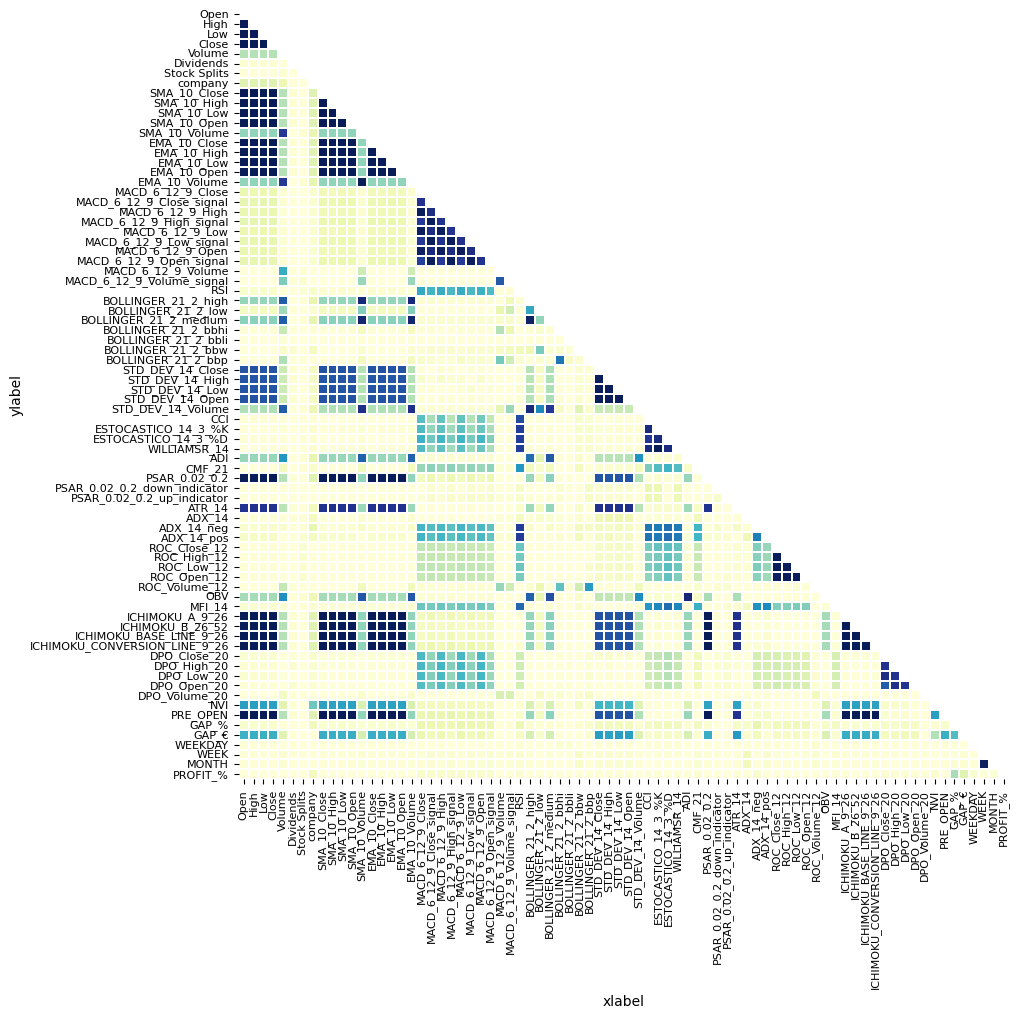

In [ ]:
# Compute the correlation matrix
corr = np.abs(df.drop(['CLOSURE'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
#             linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": 1}, square=True)   # Fijo el umbral en 0.8 cbar_kws={"shrink": .8}
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, 
            annot=False, fmt='.2f', annot_kws={"size": 7}, square=True, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            cbar=False)
ax.tick_params(labelsize=8)
plt.xlabel("xlabel", fontsize=10)
plt.ylabel("ylabel", fontsize=10)
plt.show()

plt.show()

**Hay correlaciones claras, pero vamos a verlo numericamente porque el gráfico es un poco incómodo.**

**Borramos esas variables**

In [ ]:
# Eliminar variables colineales
df.drop(columns=['High', 'Low', 'Close', 'SMA_10_Close', 'SMA_10_High', 'SMA_10_Low', 'SMA_10_Open', 'EMA_10_Close', 'EMA_10_High', 'EMA_10_Low'], inplace=True)    

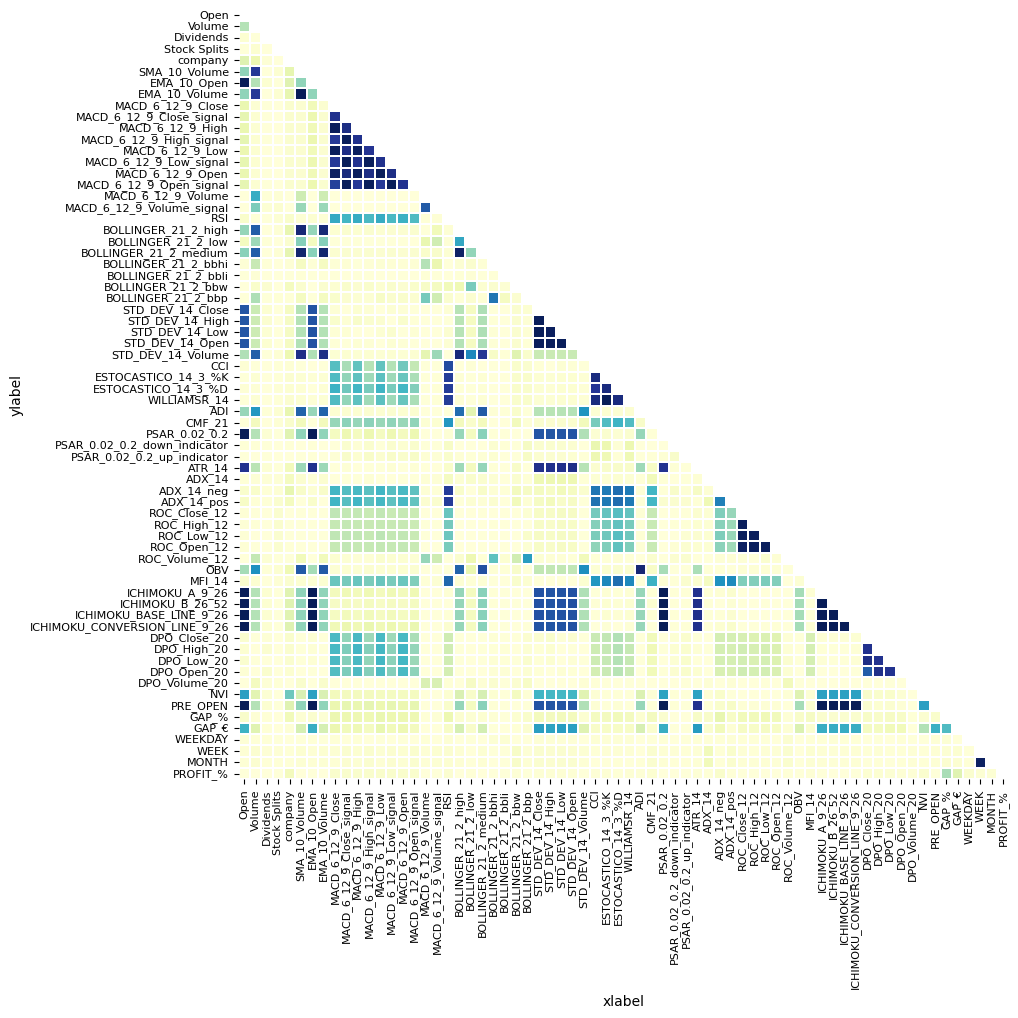

In [ ]:
#Mera comprobación
# Compute the correlation matrix
corr = np.abs(df.drop(['CLOSURE'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
#             linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": 1}, square=True)   # Fijo el umbral en 0.8 cbar_kws={"shrink": .8}
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8}, 
            annot=False, fmt='.2f', annot_kws={"size": 7}, square=True, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            cbar=False)
ax.tick_params(labelsize=8)
plt.xlabel("xlabel", fontsize=10)
plt.ylabel("ylabel", fontsize=10)
plt.show()

plt.show()

**Y para terminar, miramos la correlacion uno a uno de cada variable con 'CLOSURE':**

In [ ]:
# Mostrar correlacion entre las variables y la label
pd.options.display.max_rows = len(df)  # Para que muestre los listados completos
corr_matrix = df.corr()
corr_matrix["CLOSURE"].sort_values(ascending=False)

CLOSURE                          1.000000
GAP_%                            0.300951
GAP_€                            0.170418
company                          0.088893
NVI                              0.035787
WEEKDAY                          0.033675
RSI                              0.031168
CMF_21                           0.026944
WEEK                             0.022433
MONTH                            0.021713
WILLIAMSR_14                     0.016429
ESTOCASTICO_14_3_%K              0.016429
BOLLINGER_21_2_bbw               0.014221
CCI                              0.014057
MFI_14                           0.013950
BOLLINGER_21_2_low               0.010750
ADX_14_pos                       0.009692
ROC_Volume_12                    0.009549
ESTOCASTICO_14_3_%D              0.009395
Open                             0.007744
BOLLINGER_21_2_bbp               0.007409
PSAR_0.02_0.2_up_indicator       0.007176
PRE_OPEN                         0.005866
Stock Splits                     0

**Esta información sugiere que la variable CLOSURE está moderadamente correlacionada con algunas variables en su conjunto de datos, pero no muy fuertemente con ninguna de ellas, salvo con PROFIT_% como es lógico. También hay algunas variables con correlaciones negativas moderadas, lo que significa que cuando la variable objetivo CLOSURE aumenta, esas variables tienden a disminuir. En difinitiva ninguna variable correlaciona de manera importante con 'CLOSURE' puede significar que la relación entre ellas no es lineal, o que la relación es más compleja que una simple correlación lineal. En otras palabras, las variables predictoras pueden estar interactuando entre sí de una manera que no es capturada por la correlación lineal.**
  

**Vamos a eliminar 'PROFIT_%' por su alta correlacion con 'CLOSURE'**

In [ ]:
# Eliminar 'PROFIT_%'
df.drop(columns=['PROFIT_%'], inplace=True)   

**Y finalmente lo que queda es:**

In [ ]:
# Las variables con las que vamos a modelar son:
columnas = df.columns
print(f'Las variables con las que voy a modelar son: {columnas} \n')

# Ver la dimension del df resultante
print(f'La dimensiones del dataset de training al inicio eran: (54009, 82) y la dimension del df en este momento es: {df.shape}')

Las variables con las que voy a modelar son: Index(['CLOSURE', 'Open', 'Volume', 'Dividends', 'Stock Splits', 'company',
       'SMA_10_Volume', 'EMA_10_Open', 'EMA_10_Volume', 'MACD_6_12_9_Close',
       'MACD_6_12_9_Close_signal', 'MACD_6_12_9_High',
       'MACD_6_12_9_High_signal', 'MACD_6_12_9_Low', 'MACD_6_12_9_Low_signal',
       'MACD_6_12_9_Open', 'MACD_6_12_9_Open_signal', 'MACD_6_12_9_Volume',
       'MACD_6_12_9_Volume_signal', 'RSI', 'BOLLINGER_21_2_high',
       'BOLLINGER_21_2_low', 'BOLLINGER_21_2_medium', 'BOLLINGER_21_2_bbhi',
       'BOLLINGER_21_2_bbli', 'BOLLINGER_21_2_bbw', 'BOLLINGER_21_2_bbp',
       'STD_DEV_14_Close', 'STD_DEV_14_High', 'STD_DEV_14_Low',
       'STD_DEV_14_Open', 'STD_DEV_14_Volume', 'CCI', 'ESTOCASTICO_14_3_%K',
       'ESTOCASTICO_14_3_%D', 'WILLIAMSR_14', 'ADI', 'CMF_21', 'PSAR_0.02_0.2',
       'PSAR_0.02_0.2_down_indicator', 'PSAR_0.02_0.2_up_indicator', 'ATR_14',
       'ADX_14', 'ADX_14_neg', 'ADX_14_pos', 'ROC_Close_12', 'ROC_High_12',

**Hemos reducido en un 25% las medidas del df de training. Una reducción así probablemente no tendrá un gran impacto en el rendimiento del modelo, porque como hemos explicado se han eliminado sobre todo filas que presentaban NaN o infinito en columnas calculadas. Y en varios casos los cálculos requieren datos previos que por la naturaleza del caso es lógico que no estén presentes.**

**Nos queda balancear las clases, pues por cada 3 registros con CLOSURE = 0 hay solo 1 registro con valor 1. Lo comprobamos a continuación.**

In [ ]:
counts = df['CLOSURE'].value_counts().sort_index(ascending=True)
print(counts)

0.0    3496
1.0    9239
Name: CLOSURE, dtype: int64


**Balancemos clases:**

In [ ]:
# Separar los datos en dos grupos según la clase
df_class_0 = df[df['CLOSURE'] == 0.0]
df_class_1 = df[df['CLOSURE'] == 1.0]

# Determinar cuál es la clase con menor cantidad de datos
minority_class = min([df_class_0.shape[0], df_class_1.shape[0]])

# Tomar una muestra aleatoria de la clase mayoritaria
df_class_1_balanced = df_class_1.sample(minority_class, random_state=0)

# Combinar los dos grupos balanceados
df = pd.concat([df_class_1_balanced, df_class_0])

In [ ]:
# Mera comprobacion
counts = df['CLOSURE'].value_counts().sort_index(ascending=True)
print(counts)

0.0    3496
1.0    3496
Name: CLOSURE, dtype: int64


**Ya están balanceados.**

**Vamos a comprobar que todos los valores son numericos y que no hay valores no deseados**

In [ ]:
# Calcular el porcentaje de valores NaN, infinitos positivos e infinitos negativos en cada columna
nan_pct = df.isin([np.nan]).mean() * 100
inf_pct = df.isin([np.inf, -np.inf]).mean() * 100

# Imprimir los resultados
print("Porcentaje de valores NaN:")
print(nan_pct)
print("\n**************\nPorcentaje de valores infinitos:")
print(inf_pct)

Porcentaje de valores NaN:
CLOSURE                          0.0
Open                             0.0
Volume                           0.0
Dividends                        0.0
Stock Splits                     0.0
company                          0.0
SMA_10_Volume                    0.0
EMA_10_Open                      0.0
EMA_10_Volume                    0.0
MACD_6_12_9_Close                0.0
MACD_6_12_9_Close_signal         0.0
MACD_6_12_9_High                 0.0
MACD_6_12_9_High_signal          0.0
MACD_6_12_9_Low                  0.0
MACD_6_12_9_Low_signal           0.0
MACD_6_12_9_Open                 0.0
MACD_6_12_9_Open_signal          0.0
MACD_6_12_9_Volume               0.0
MACD_6_12_9_Volume_signal        0.0
RSI                              0.0
BOLLINGER_21_2_high              0.0
BOLLINGER_21_2_low               0.0
BOLLINGER_21_2_medium            0.0
BOLLINGER_21_2_bbhi              0.0
BOLLINGER_21_2_bbli              0.0
BOLLINGER_21_2_bbw               0.0
BOLLINGER_2

In [ ]:
# Comprobar que todos los valores en el df son numericos, pues de lo contrario no los puedo meter a un modelo
non_numeric_columns = df.select_dtypes(exclude='number')
if non_numeric_columns.empty:
    print("Todos los valores en el DataFrame SON NUMERICOS.")
else:
    print("Hay valores no numéricos en las siguientes columnas:", non_numeric_columns.columns)

Todos los valores en el DataFrame SON NUMERICOS.


**Nos quedaría normalizarlos. Esta operación se hará en el notebook de Modelado.**


**Y reservamos una copia de los valores de TRAIN preprocesados en este punto.**

In [ ]:
# Reservar copia del conjunto de train en formato csv
df.to_csv('train_preprocesado.csv', sep=',', decimal='.', index=False)
files.download('train_preprocesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Definimos una funcion de preprocesado con todas las operaciones y transformaciones hechas en train.**

In [ ]:
def preprocesado (df):
    # Verificar si existe una columna llamada 'Unnamed: 0' y eliminarla si es necesario
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    else:
        pass

    # Eliminar las filas que tengan valores negativos en al menos una de las columnas 'Open', 'High', 'Low' y 'Close'
    # Crear máscara booleana valor True para las filas con valores positivos en todas las columnas y False para todas las demás filas.
    mask = (df['Open'] >= 0) & (df['High'] >= 0) & (df['Low'] >= 0) & (df['Close'] >= 0)
    # Filtrar filas con valores no negativos
    df = df[mask]

    # Crear una máscara booleana para las filas que cumplen la condición
    mask = (df['CLOSURE'] == 1) & (df['PROFIT_%'] > 20)
    # Eliminar las filas que cumplen la condición
    df = df.drop(df[mask].index)

    # codificar "company" usando Mean Encoding y el diccionario company_dict creado antes con train
    df['company'] = df['company'].map(company_dict)

    # Eliminar las columnas 'PSAR_0.02_0.2_down' y 'PSAR_0.02_0.2_up' del DataFrame
    df = df.drop(['PSAR_0.02_0.2_down', 'PSAR_0.02_0.2_up'], axis=1)

    # Eliminar las filas que contienen valores NaN o valores infinitos
    # Reemplazar los valores infinitos con NaN
    df = df.replace([np.inf, -np.inf], np.nan)
    # Eliminar los NaN
    df = df.dropna()

    # Eliminar variables colineales
    df.drop(columns=['High', 'Low', 'Close', 'SMA_10_Close', 'SMA_10_High', 'SMA_10_Low', 'SMA_10_Open', 'EMA_10_Close', 'EMA_10_High', 'EMA_10_Low'], inplace=True)

    # Eliminar 'PROFIT_%'
    df.drop(columns=['PROFIT_%'], inplace=True)   

    # Balanceado de clases
    # Separar los datos en dos grupos según la clase
    df_class_0 = df[df['CLOSURE'] == 0.0]
    df_class_1 = df[df['CLOSURE'] == 1.0]
    # Determinar cuál es la clase con menor cantidad de datos
    minority_class = min([df_class_0.shape[0], df_class_1.shape[0]])
    # Tomar una muestra aleatoria de la clase mayoritaria
    df_class_1_balanced = df_class_1.sample(minority_class, random_state=0)
    # Combinar los dos grupos balanceados
    df = pd.concat([df_class_1_balanced, df_class_0])
    
    return df



####TODAS LAS OPERACIONES HECHAS CON EL CONJUNTO DE DATOS DE TRAIN LAS VAMOS A REPLICAR CON TEST.

In [ ]:
# Cargar el dataset de test: 
df = pd.read_csv('test.csv', sep=',', decimal='.')

**Aplicamos la funcion de preprocesado sobre los datos de test.**

In [ ]:
#  Preprocesar datos test
df = preprocesado (df)

**Creamos una funcion que comprueba que los datos son todos numericos, sin NaN ni infinitos y correctamente balanceados.**

In [ ]:
def calidad_datos (df):
    # Comprobar el balanceo es adecuado
    counts = df['CLOSURE'].value_counts().sort_index(ascending=True)
    print('El balanceo queda así:')
    print(counts)

    # Comprobar que todos los valores en el df son numericos, pues de lo contrario no los puedo meter a un modelo
    non_numeric_columns = df.select_dtypes(exclude='number')
    if non_numeric_columns.empty:
        print("No hay valores no numéricos en el DataFrame.")
    else:
        print("Hay valores no numéricos en las siguientes columnas:", non_numeric_columns.columns)

    # Calcular el porcentaje de valores NaN e infinitos en todo el dataframe
    nan_inf_pct = ((df.isin([np.nan]).any(axis=1) | df.isin([np.inf, -np.inf]).any(axis=1)).mean()) * 100
    print(f"Porcentaje de valores NaN e infinitos: {nan_inf_pct:.2f}%")
    
    return df

**Y miramos la calidad de los datos.**

In [ ]:
df = calidad_datos (df)

El balanceo queda así:
0.0    775
1.0    775
Name: CLOSURE, dtype: int64
No hay valores no numéricos en el DataFrame.
Porcentaje de valores NaN e infinitos: 0.00%


**Y reservamos una copia de los valores de TEST preprocesados en este punto.**

In [ ]:
# Reservar copia del conjunto de test en formato csv
df.to_csv('test_preprocesado.csv', sep=',', decimal='.', index=False)
files.download('test_preprocesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####TODAS LAS OPERACIONES HECHAS CON EL CONJUNTO DE DATOS DE TRAIN LAS VAMOS A REPLICAR CON VALIDACION.

In [ ]:
# Cargar el dataset de validacion: 
df = pd.read_csv('validation.csv', sep=',', decimal='.')

**Aplicamos la funcion de preprocesado sobre los datos de test.**

In [ ]:
# Preprocesar datos test
df = preprocesado (df)

**Verificamos la calidad de los datos.**

In [ ]:
df = calidad_datos (df)

El balanceo queda así:
0.0    363
1.0    363
Name: CLOSURE, dtype: int64
No hay valores no numéricos en el DataFrame.
Porcentaje de valores NaN e infinitos: 0.00%


**Y reservamos una copia de los valores de VALIDACION preprocesados en este punto.**

In [ ]:
# Reservar copia del conjunto de validacion en formato csv
df.to_csv('validation_preprocesado.csv', sep=',', decimal='.', index=False)
files.download('validation_preprocesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Preprocesado de datos ACTUALES a predecir**

In [ ]:
df_predecir = pd.read_csv('ibex_para_predecir.csv', sep=',', decimal='.')

In [ ]:
df_predecir = preprocesado (df_predecir)
df_predecir = calidad_datos (df_predecir)

El balanceo queda así:
0.0    18
1.0    18
Name: CLOSURE, dtype: int64
No hay valores no numéricos en el DataFrame.
Porcentaje de valores NaN e infinitos: 0.00%


In [ ]:
df_predecir.to_csv('ibex_predecir_preprocesado.csv', sep=',', decimal='.', index=False)
files.download('ibex_predecir_preprocesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>